In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
wine=pd.read_csv(r'C:\Users\Vikas Salunke\Desktop\Data Science\wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine['Malic'].value_counts()

1.73    7
1.67    4
1.81    4
1.68    3
1.61    3
       ..
1.09    1
1.19    1
1.17    1
1.01    1
4.10    1
Name: Malic, Length: 133, dtype: int64

In [5]:
wine2=wine.iloc[:,4:]
wine2

,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...
173,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
wine2.shape

(178, 10)

In [7]:
wine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcalinity       178 non-null    float64
 1   Magnesium        178 non-null    int64  
 2   Phenols          178 non-null    float64
 3   Flavanoids       178 non-null    float64
 4   Nonflavanoids    178 non-null    float64
 5   Proanthocyanins  178 non-null    float64
 6   Color            178 non-null    float64
 7   Hue              178 non-null    float64
 8   Dilution         178 non-null    float64
 9   Proline          178 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 14.0 KB


In [8]:
wine_ary=wine2.values
wine_ary

array([[1.560e+01, 1.270e+02, 2.800e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.120e+01, 1.000e+02, 2.650e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.860e+01, 1.010e+02, 2.800e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [2.000e+01, 1.200e+02, 1.590e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [2.000e+01, 1.200e+02, 1.650e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [2.450e+01, 9.600e+01, 2.050e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
wine_norm=scale(wine_ary)
wine_norm

array([[-1.16959318,  1.91390522,  0.80899739, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-2.49084714,  0.01814502,  0.56864766, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-0.2687382 ,  0.08835836,  0.80899739, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.15166079,  1.42241183, -1.12982378, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.15166079,  1.42241183, -1.03368389, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.50294326, -0.26270834, -0.39275127, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [11]:
pca=PCA(n_components=10)

wine_pca=pca.fit_transform(wine_norm)
wine_pca

array([[ 3.07479988, -1.14680113,  0.09962586, ..., -0.50376322,
         0.93354164, -0.0630271 ],
       [ 2.10309967, -0.15902802, -2.27277407, ..., -0.14857727,
         0.29698852,  0.053614  ],
       [ 2.60126289, -0.7818449 ,  0.685887  , ..., -0.68512562,
        -0.12440748,  0.15815563],
       ...,
       [-2.45407016, -2.96648185,  0.10703885, ...,  0.02881471,
         0.44065261, -0.0646473 ],
       [-2.51183093, -2.67050302,  0.27809112, ..., -0.22134763,
         0.31480361, -0.08025771],
       [-3.1618135 , -1.37547683,  1.28289324, ...,  0.34547614,
         0.0426972 , -0.32551155]])

In [12]:
pca.components_

array([[-0.23734335,  0.14452004,  0.41360726,  0.44319698, -0.31260377,
         0.33545397, -0.10883176,  0.30366935,  0.40065233,  0.28364654],
       [ 0.12905796, -0.41849325, -0.0612572 ,  0.02118444,  0.04426184,
        -0.08448676, -0.65233617,  0.34685976,  0.24155524, -0.43669897],
       [ 0.78277014,  0.19750551,  0.19067364,  0.14232018,  0.13030333,
         0.41989231,  0.07520462, -0.16615828,  0.10064689, -0.23445342],
       [ 0.11438822,  0.78582034, -0.245869  , -0.1624299 , -0.28581788,
        -0.19627814, -0.32814032,  0.21996145, -0.05995557, -0.05192242],
       [ 0.08579708,  0.14040317,  0.06156681,  0.01677204,  0.75771238,
        -0.08196639, -0.00169432,  0.51088416, -0.05864456,  0.35151503],
       [-0.45074473,  0.16120251, -0.17239393, -0.13017896,  0.24376562,
         0.70869816, -0.12298752,  0.00150022, -0.21645776, -0.31704858],
       [-0.27748322,  0.3010354 ,  0.35924261,  0.12237431,  0.38418369,
        -0.32359977, -0.19266426, -0.49587249

In [13]:
var=pca.explained_variance_ratio_
var

array([0.43748934, 0.17601378, 0.09475992, 0.08154667, 0.07017008,
       0.04832355, 0.03425714, 0.028225  , 0.01826068, 0.01095385])

In [14]:
var1=np.cumsum(np.round(var,3)*100)
var1

array([43.7, 61.3, 70.8, 79. , 86. , 90.8, 94.2, 97. , 98.8, 99.9])

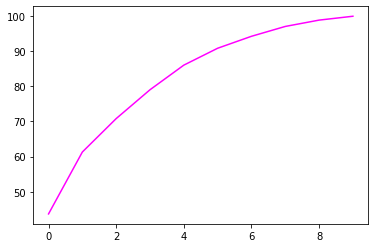

In [15]:
plt.plot(var1,color='magenta')

In [18]:
final_df=pd.concat([wine['Malic'],pd.DataFrame(wine_pca[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df

,Malic,PC1,PC2,PC3
0,1.71,3.074800,-1.146801,0.099626
1,1.78,2.103100,-0.159028,-2.272774
2,2.36,2.601263,-0.781845,0.685887
3,1.95,3.537905,-2.401738,0.271687
4,2.59,1.084485,-0.078511,1.023671
...,...,...,...,...
173,5.65,-2.916124,-1.172950,-0.246170
174,3.91,-2.443097,-1.245600,0.568392
175,4.28,-2.454070,-2.966482,0.107039
176,2.59,-2.511831,-2.670503,0.278091


<AxesSubplot:>

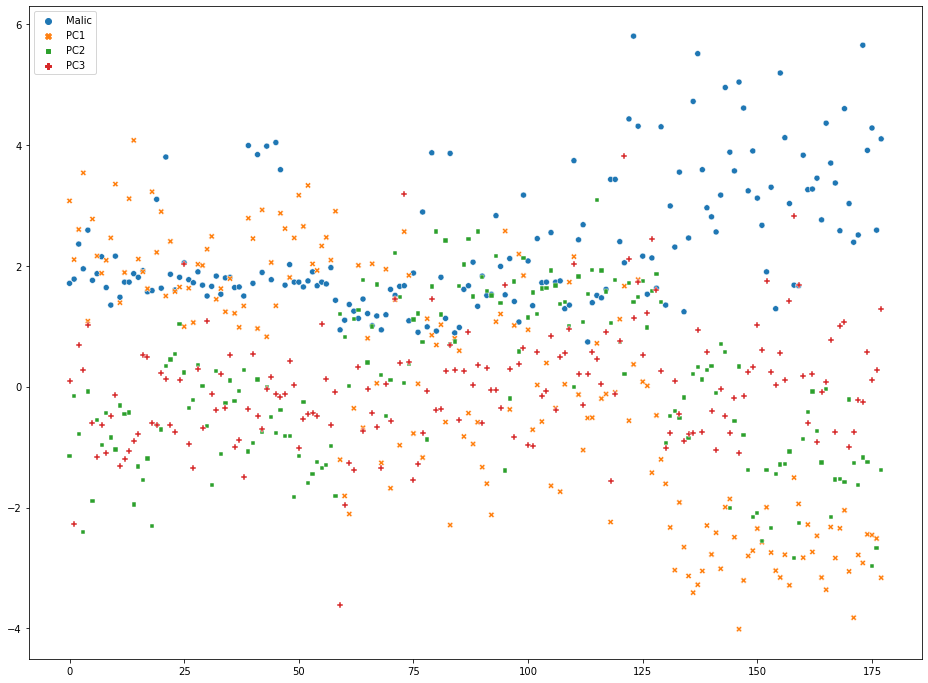

In [19]:
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=final_df)

In [20]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

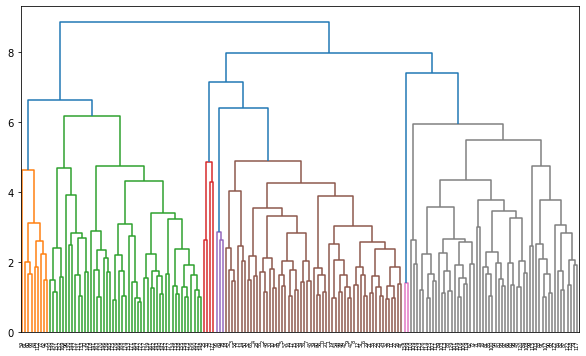

In [21]:
plt.figure(figsize=(10,6))
dendrogram=sch.dendrogram(sch.linkage(wine_norm,'complete'))

In [24]:
hclusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=4)

In [25]:
y=pd.DataFrame(hclusters.fit_predict(wine_norm),columns=['clustersid'])
y['clustersid'].value_counts()

2    65
0    52
1    32
3    29
Name: clustersid, dtype: int64

In [26]:
wine3=wine.copy()
wine3['clustersid']=hclusters.labels_
wine3

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [27]:
from sklearn.cluster import KMeans

In [28]:
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(wine_norm)
    wcss.append(kmeans.inertia_)

C:\Users\Vikas Salunke\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


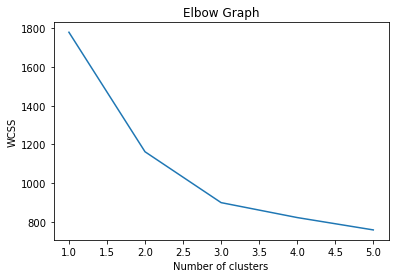

In [30]:
plt.plot(range(1,6),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
clusters3=KMeans(3,random_state=40).fit(wine_norm)
clusters3

KMeans(n_clusters=3, random_state=40)

In [32]:
clusters3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2,
       0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [33]:
wine4=wine.copy()
wine4['clusters3id']=clusters3.labels_
wine4

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters3id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [34]:
wine4['clusters3id'].value_counts()

0    70
2    54
1    54
Name: clusters3id, dtype: int64